# SI 618: Data Manipulation and Analysis
## 06 - Categorical Data & Text Processing 
### Contingency tables, crosstabs, mosaic plots and chi-squared
### Introduction to text processing
### Dr. Chris Teplovs, School of Information, University of Michigan
Copyright &copy; 2024.  This notebook may not be shared outside of the course without permission.
### Please ensure you have this version:
Version 2024.02.14.3.CT


## Outline of today's class
1. Announcements

2. Questions about the material so far?
3. Project part I (due date extended to 2/21)
4. Finishing up last week's material
5. Coding basics: debugging
6. "Lecture" on Categorical Data & Text Processing
    - Contingency tables, crosstabs, mosaic plots and chi-squared
    - Introduction to text processing
7. Coding exercises (also interspersed throughout the lecture)

## Debugging
Debugging is the process of finding and fixing errors in your code.  It's a critical skill for any programmer.  Here are some tips for debugging your code:

1. **Understand the error message**.  Python will often give you a helpful error message that tells you what went wrong.  Read it carefully and try to understand what it's telling you.  If you don't understand the error message, try Googling it.
2. **Use print statements**.  If you're not sure what's going on, add print statements to your code to see what's happening.  For example, if you're not sure what a variable's value is, add a print statement to print it out.
3. **Use a debugger**.  A debugger is a tool that lets you step through your code one line at a time and see what's happening.  This can be very helpful for understanding what your code is doing and finding errors.  Visual Studio Code has a powerful built-in debugger, and there are also other debuggers available for Python.
4. **Use a rubber duck**.  If you're really stuck, try explaining your code to someone else, or even to an inanimate object like a rubber duck.  This can help you think through the problem and find the error.
5. **Take a break**.  If you're really stuck, sometimes it helps to take a break and come back to the problem later.  Often, you'll find that the solution comes to you when you're not actively thinking about the problem.
6. **Ask for help**.  If you're really stuck, don't be afraid to ask for help.  You can ask your classmates, your instructor, or even on a site like Stack Overflow.



Types of errors:

1. **Syntax errors**: These are errors where the code is not valid Python (generally easy to fix).  Example:
```python
print("hello)
```
2. **Runtime errors**: These errors are usually logical errors that cause the program to crash (often easy to fix).  Example:
```python
x = 1 / 0
```
3. **Semantic errors**: These errors are the hardest to find, because the code is valid, but it doesn't do what you intended (often very hard to fix).  Example:
```python
x = 2
y = 3
z = x + 3

# should be
z = x + y
```

4. **Logical errors**: These are errors where the code is valid Python, but the logic is wrong (often hard to fix).  Example of a logical error:
```python
# This code is supposed to calculate the average of a list of numbers
# but it doesn't work because it doesn't divide by the length of the list
def average(numbers):
    total = sum(numbers)
    return total
```

1. **Exceptions**: These are errors that occur when something goes wrong (e.g., division by zero, trying to access a file that doesn't exist, etc.).  They are often thrown at runtime.  Example (from above):
```python
x = 1 / 0
```

2. **Warnings**: These are messages that Python gives you when something is not necessarily wrong, but might be a problem (e.g., using a deprecated feature, using a variable before it's defined, etc.)
```python
import numpy as np
np.array([1])/0 
```




#### Task: Debuggging
Below is a Python code snippet intentionally filled with various types of errors. It's a simple program that's meant to read in data from an example CSV file, perform some basic data manipulation and analysis, then output some results. Please note that the path to the 'example.csv' file will need to be adjusted to wherever the file is actually located. You will need to create a file called 'example.csv' with the following content:
```
SomeColumn,AnotherColumn
1,2
3,4
5,6
```

Your task is to debug the code and get it working.  You can use any of the debugging techniques we discussed above.  Once you've fixed the code, run it and make sure it works.  (The code is repeated here in case you mess it up and need to start over.)

```python
# Import necessary libraries
import pandas as pandaz
import numpy

# Function to calculate the average of a list
def caculate_average(num_list):
    sum_numbers = sum(num_list)
    count = len(numlist)  
    average = sum_numbers // count  calculation
    return avearge  

# Load the data from a CSV file
df = pandaz.read_csv('example.csv')

# Clean data removing any rows with missing values
df.dropna(how='any', inplace=True

# Add a calculated column that is the square of an existing column
def square_column(col_name):
    return df.apply(lamda x: x[col_name] ** 2, axis=1)

df['squared'] = square_column('SomeColumn')

# Find the average of the 'squared' column
avg_squared = caculate_average(df['squared'].tolist())

# Print the result with a formatted string
print(f"The average of the squared values is: {avg_sqaured}") 

print("The standard deviation is: ", stddev)
stddev = numpy.std(df['squared'])

max_value = max(df['squared'].astype(str))
```

In [206]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Function to calculate the average of a list


def calculate_average(num_list):
    sum_numbers = sum(num_list)
    count = len(num_list)
    average = sum_numbers // count
    return average


# Load the data from a CSV file
df = pd.read_csv('example.csv')

# Clean data removing any rows with missing values
df.dropna(how='any', inplace=True)

# Add a calculated column that is the square of an existing column


def square_column(col_name):
    return df.apply(lambda x: x[col_name] ** 2, axis=1)


df['squared'] = square_column('SomeColumn')

# Find the average of the 'squared' column and print the result
avg_squared = calculate_average(df['squared'].tolist())
print(f"The average of the squared values is: {avg_squared}")

# Find the standard deviation and maximum value of the 'squared' column
stddev = np.std(df['squared'])
print("The standard deviation is: ", stddev)

# Find the maximum value of the 'squared' column
max_value = max(df['squared'].astype(str)) # changing the type to float generates an entirely different answer
print("The maximum value is: ", max_value)

The average of the squared values is: 11
The standard deviation is:  9.977753031397176
The maximum value is:  9


# Categorical Data

Categorical data are those that can take on one of a limited number of values (i.e. categories) (Wikipedia)

Examples: blood type (A, B, AB, O); types of rock (sedimentary, metamorphic, igneous).

## Contingency tables, crosstabs, and chi-square

In [207]:
import pandas as pd
import seaborn as sns
import numpy as np

from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import chi2_contingency

Let's generate a data frame to play with:

In [208]:
df = pd.DataFrame(
    {'color': ['red', 'green', 'green', 'black'] * 6,
     'make':['ford', 'toyota', 'dodge'] * 8,
     'vehicleClass': ['suv', 'suv', 'suv', 'car', 'car', 'truck'] * 4}
)

In [209]:
df

,color,make,vehicleClass
0,red,ford,suv
1,green,toyota,suv
2,green,dodge,suv
3,black,ford,car
4,red,toyota,car
5,green,dodge,truck
6,green,ford,suv
7,black,toyota,suv
8,red,dodge,suv
9,green,ford,car


In [210]:
df.shape

(24, 3)

One of the most basic transformations we can do is a crosstab:

In [211]:
ct = pd.crosstab(df.color, df.vehicleClass)
ct

vehicleClass,car,suv,truck
color,,,
black,2,2,2
green,4,6,2
red,2,4,0


Notice how similar it is to pivoting.  In fact, go ahead and use ```pivot_table``` to do the same sort of transformation:

### Challenge 1: 
Use ```pivot_table``` to create a DataFrame similar to the one from the ```crosstab``` above:

In [212]:
pd.pivot_table(df, index='color', columns='vehicleClass', aggfunc=len, fill_value=0)

make          
vehicleClass  car suv truck
color                      
black           2   2     2
green           4   6     2
red             2   4     0

Let's make sure we have the right data in `ct`:

In [213]:
ct = pd.crosstab(df.color, df.vehicleClass)
ct

vehicleClass,car,suv,truck
color,,,
black,2,2,2
green,4,6,2
red,2,4,0


As usual, we would like to visualize our results:

<Axes: xlabel='vehicleClass', ylabel='color'>

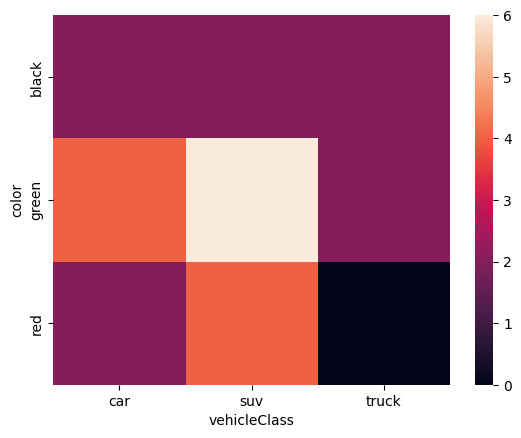

In [214]:
sns.heatmap(ct, annot=False)

<Axes: xlabel='vehicleClass', ylabel='color'>

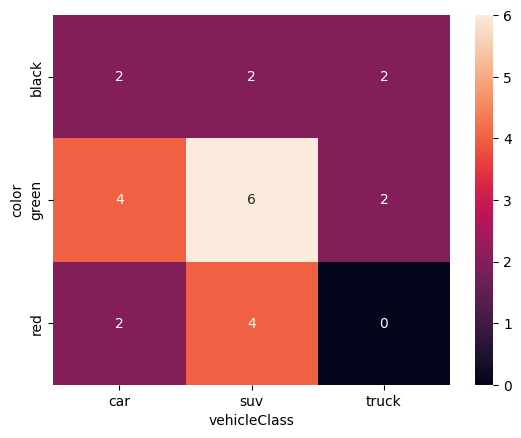

In [215]:
sns.heatmap(ct,annot=True)

You might want to investigate other palettes, see https://seaborn.pydata.org/tutorial/color_palettes.html for more details.



<Axes: xlabel='vehicleClass', ylabel='color'>

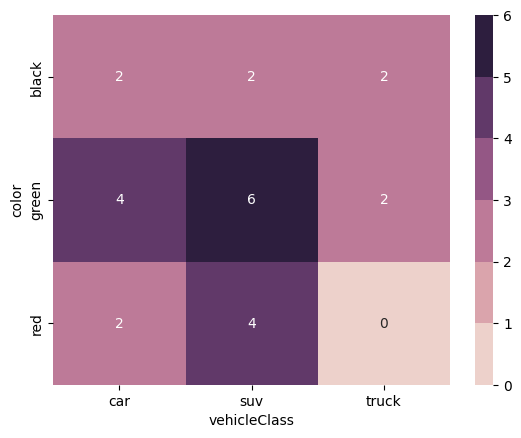

In [216]:
sns.heatmap(ct, annot=True, cmap=sns.cubehelix_palette())

<Axes: xlabel='vehicleClass', ylabel='color'>

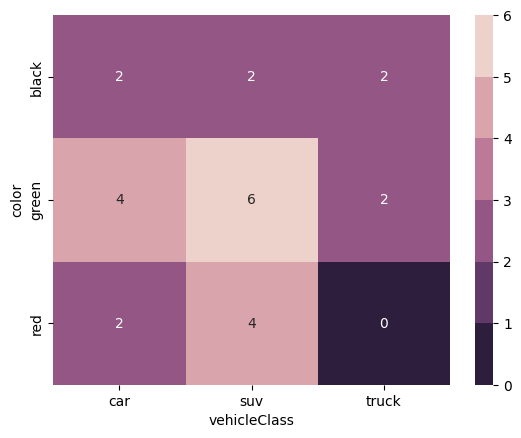

In [217]:
sns.heatmap(ct,annot=True,cmap=sns.cubehelix_palette(reverse=True))

### Titanic data

One of the more popular datasets that we use for experimenting with crosstabs is the 
survivor data from the Titanic disaster:

In [218]:
titanic = pd.read_csv('https://raw.githubusercontent.com/umsi-data-science/data/main/titanic.csv')

In [219]:
titanic.sample(5)

,passtype,age,status,sex
780,crew,adult,dead,male
581,third,adult,dead,male
1750,crew,adult,alive,male
1842,crew,adult,alive,male
952,crew,adult,dead,male


Let's create a crosstab of the data:

In [220]:
ct = pd.crosstab(titanic.passtype,
                titanic.status,
                margins=False)
ct

status,alive,dead
passtype,,
crew,212,673
first,203,122
second,118,167
third,178,528


<Axes: xlabel='status', ylabel='passtype'>

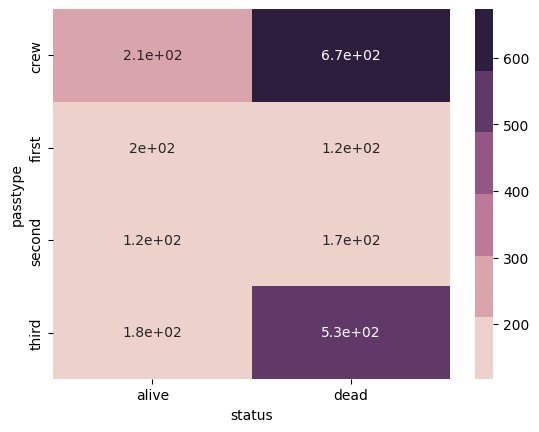

In [221]:
sns.heatmap(ct,annot=True,cmap=sns.cubehelix_palette())

Does scientific notation bother you?  Change the format with the ```fmt=``` argument:

<Axes: xlabel='status', ylabel='passtype'>

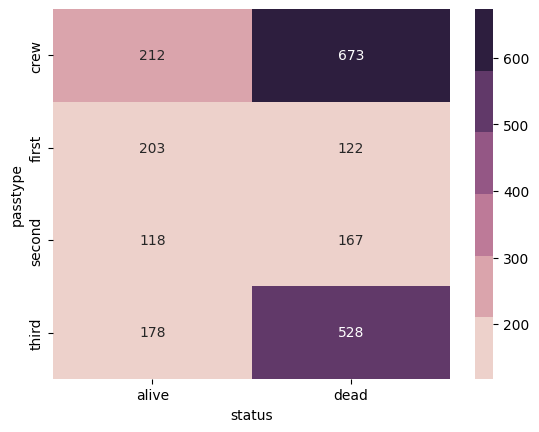

In [222]:
sns.heatmap(ct,annot=True,cmap=sns.cubehelix_palette(),fmt='d')

#### Challenge 2: 
Is there something interesting here?

From the heatmap, we can infer that when the Titanic sank, the most people that died belonged to the crew class (673 people), followed closely by third class passengers (528 people), while amongst the first class passengers, there were more people who made it out alive than those who lost their lives.

In addition to the heatmap shown above, we can use a mosaic plot to visualize 
contingency tables:

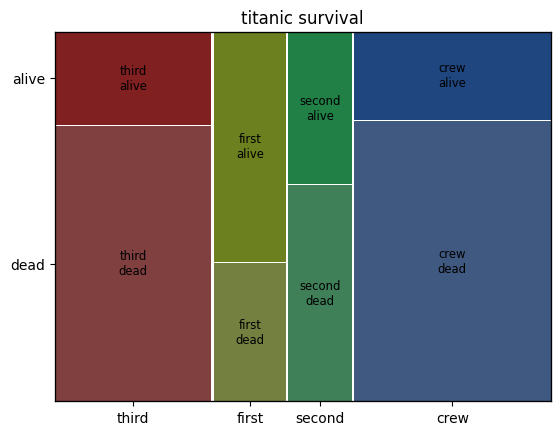

In [223]:
t = mosaic(titanic, ['passtype', 'status'], title='titanic survival')

Let's take a look at the "expected" values for each cell.  That is,
the values that we would expect if there was no effect of "passtype" on "status".  To do this, let's take a look at the marginal totals:

In [224]:
ct = pd.crosstab(titanic.passtype, titanic.status, margins=True)
ct

status,alive,dead,All
passtype,,,
crew,212,673,885
first,203,122,325
second,118,167,285
third,178,528,706
All,711,1490,2201


The **expected** value for each cell (i.e. the value that you would expect if there was no interaction between passtype and status in this dataset) can be calculated by taking the row total multiplied by the column total and divided by the overall total.  

So we would get the following expected value for alive crew:

In [225]:
exp = ct['All'].loc['first'] * ct['alive'].loc['All'] / ct['All'].loc['All']

In [226]:
exp

104.98636983189459

You could repeat this for each cell (or write code to do so), but you get the idea.

## Let's talk about $ \chi^2 $



Finally, we can go beyond visual exploration and apply analytic tests to see if the 
observed values differ from the expected ones.  The chi-square test sums the squares of the differences
between the observed and expected values, normalized for the expected values.

Our null hypothesis is that there is no difference in survivorship based on passage type.

Here's [a video resource](https://www.youtube.com/watch?v=VskmMgXmkMQ) that explains chi-squared.

We can show marginal totals:

In [227]:
ct = pd.crosstab(titanic.passtype, titanic.status, margins=True)
ct

status,alive,dead,All
passtype,,,
crew,212,673,885
first,203,122,325
second,118,167,285
third,178,528,706
All,711,1490,2201


Or not:

Note that if you're going to do a chi-squared test, you need to use raw counts, not percentages, and you should not include the marginal totals:

In [120]:
ct = pd.crosstab(titanic.passtype, titanic.status, margins=False)
ct

status,alive,dead
passtype,,
crew,212,673
first,203,122
second,118,167
third,178,528


In [228]:
chi2, p, dof, expected = chi2_contingency(ct)

print("chi^2 = ", chi2)
print("p-val = ", p)
print("degree of freedom = ", dof)

chi^2 =  190.40110361683327
p-val =  6.705773035354302e-37
degree of freedom =  8


As a bonus, we also get a DataFrame of the expected values:

In [230]:
pd.DataFrame(expected)

,0,1,2
0,285.885961,599.114039,885.0
1,104.986370,220.013630,325.0
2,92.064970,192.935030,285.0
3,228.062699,477.937301,706.0
4,711.000000,1490.000000,2201.0


## Let's apply these ideas to another dataset

For this component, we'll use the Comic Characters data set:

In [231]:
comic_characters = pd.read_csv("https://raw.githubusercontent.com/umsi-data-science/data/main/comic_characters.csv", index_col="id")
comic_characters.tail()

,publisher,name,Identity,align,eye,hair,sex,alive,appearances,first_appearance,month,year,date
id,,,,,,,,,,,,,
23268,DC,Nadine West (New Earth),Public Identity,Good Characters,NaN,NaN,Female Characters,Living Characters,NaN,NaN,1,NaN,NaN
23269,DC,Warren Harding (New Earth),Public Identity,Good Characters,NaN,NaN,Male Characters,Living Characters,NaN,NaN,1,NaN,NaN
23270,DC,William Harrison (New Earth),Public Identity,Good Characters,NaN,NaN,Male Characters,Living Characters,NaN,NaN,1,NaN,NaN
23271,DC,William McKinley (New Earth),Public Identity,Good Characters,NaN,NaN,Male Characters,Living Characters,NaN,NaN,1,NaN,NaN
23272,DC,Mookie (New Earth),Public Identity,Bad Characters,Blue Eyes,Blond Hair,Male Characters,Living Characters,NaN,NaN,1,NaN,NaN


### Example

We'd like to know which publisher uses different 'identity' types for their characters? Have DC characters appeared more publicly? What is the average number of times Marvel Characters appeared known to authorities identity?

In [232]:
comic_characters.groupby(['Identity', 'publisher'])['appearances'].mean().unstack().fillna(0)

publisher,DC,Marvel
Identity,,
Identity Unknown,3.000000,0.000000
Known to Authorities Identity,0.000000,74.400000
No Dual Identity,0.000000,24.402013
Public Identity,28.287166,23.407615
Secret Identity,32.655157,17.379794


Alternatively, we can use .pivot_table(). For example:

In [233]:
avg_appearance_per_identity = comic_characters.pivot_table(
    index='Identity',
    columns='publisher',
    values='appearances',
    aggfunc='mean'
)
avg_appearance_per_identity.fillna(0).head()

publisher,DC,Marvel
Identity,,
Identity Unknown,3.000000,0.000000
Known to Authorities Identity,0.000000,74.400000
No Dual Identity,0.000000,24.402013
Public Identity,28.287166,23.407615
Secret Identity,32.655157,17.379794


For .pivot_table(), you need to specify these four arguments:
1. index: the field that will become the index of the output table
2. columns: the field that will become the columns of the output table
3. values: the field to be aggregated/summarized
4. aggfunc: the aggregation operator applied to values, if there are more than 1 entry corresponding to each (index, column) pair, such as "mean", "count", "max"
    

### Let's warm up with a few groupby and pivot_table exercises:

What is the total number of appearances of characters for each publisher?

In [234]:
a = comic_characters.groupby('publisher')[['appearances']].sum()
a.head()

,appearances
publisher,
DC,154532.0
Marvel,260270.0


What is the total number of appearances of characters by each publisher in each year? Output a table.

In [235]:
b = comic_characters.groupby(['year', 'publisher'])['appearances'].sum().fillna(0)
b

year    publisher
1935.0  DC            125.0
1936.0  DC            240.0
1937.0  DC            458.0
1938.0  DC           1639.0
1939.0  DC           4067.0
                      ...  
2011.0  Marvel       1890.0
2012.0  DC             17.0
        Marvel       1072.0
2013.0  DC              1.0
        Marvel       1177.0
Name: appearances, Length: 154, dtype: float64

### Can we improve that output?

Try unstacking it...

In [236]:
b = comic_characters.groupby(['year','publisher'])['appearances'].sum().unstack().fillna(0)
b.head(10)

publisher,DC,Marvel
year,,
1935.0,125.0,0.0
1936.0,240.0,0.0
1937.0,458.0,0.0
1938.0,1639.0,0.0
1939.0,4067.0,1013.0
1940.0,9123.0,2160.0
1941.0,6945.0,5371.0
1942.0,4068.0,401.0
1943.0,1475.0,541.0


#### Challenge 3: 
Construct a contingency table of sex and character alignment normalized by all values.

Display the normalized values in percentage (%) format. Use brief sentences to explain your findings.  

Hint: use "normalize=all" in your crosstab statement.  What does normalize do? (read the docs)

Your output should look like the following:


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>align</th>
      <th>Bad Characters</th>
      <th>Good Characters</th>
      <th>Neutral Characters</th>
      <th>Reformed Criminals</th>
    </tr>
    <tr>
      <th>sex</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Agender Characters</th>
      <td>0.10%</td>
      <td>0.05%</td>
      <td>0.07%</td>
      <td>0.00%</td>
    </tr>
    <tr>
      <th>Female Characters</th>
      <td>8.22%</td>
      <td>13.01%</td>
      <td>4.37%</td>
      <td>0.01%</td>
    </tr>
    <tr>
      <th>Genderfluid Characters</th>
      <td>0.00%</td>
      <td>0.01%</td>
      <td>0.01%</td>
      <td>0.00%</td>
    </tr>
    <tr>
      <th>Genderless Characters</th>
      <td>0.06%</td>
      <td>0.03%</td>
      <td>0.02%</td>
      <td>0.00%</td>
    </tr>
    <tr>
      <th>Male Characters</th>
      <td>39.51%</td>
      <td>25.13%</td>
      <td>9.40%</td>
      <td>0.01%</td>
    </tr>
    <tr>
      <th>Transgender Characters</th>
      <td>0.01%</td>
      <td>0.00%</td>
      <td>0.00%</td>
      <td>0.00%</td>
    </tr>
  </tbody>
</table>
</div>

In [241]:
ct = pd.crosstab(comic_characters.sex, comic_characters['align'], normalize=True) * 100
ct = ct.round(2).map(lambda x: "{:.2f}%".format(x))
ct

align,Bad Characters,Good Characters,Neutral Characters,Reformed Criminals
sex,,,,
Agender Characters,0.10%,0.05%,0.07%,0.00%
Female Characters,8.22%,13.01%,4.37%,0.01%
Genderfluid Characters,0.00%,0.01%,0.01%,0.00%
Genderless Characters,0.06%,0.03%,0.02%,0.00%
Male Characters,39.51%,25.13%,9.40%,0.01%
Transgender Characters,0.01%,0.00%,0.00%,0.00%


The contingency table illustrates a notable gender disparity in character representation within the comic dataset, with Male Characters comprising the majority of Bad Characters at nearly 40% as well as the Good Characters at 25%, while Female Characters constitute only around 8% of Bad Characters and 13% of Good Characters. In the same vein, we can see from the contingency table that most characters are categorized as Bad Characters or Good Characters, with significantly fewer falling into the Neutral Characters category, while some categories, such as Genderfluid Characters and Transgender Characters, have very low representation in the dataset.

#### Challenge 4: 
Create a mosaic plot of align and alive.  

Conduct a $\chi^2$ test of ```align``` and ```alive```. Please specify your (null and alternative) hypotheses and explain your findings.

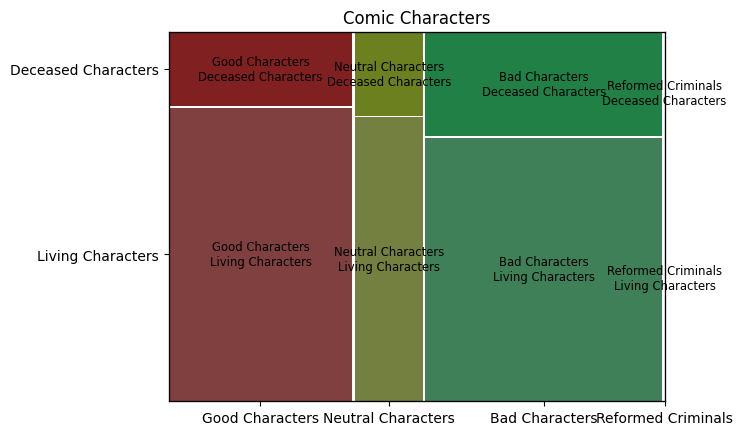

In [242]:
t = mosaic(comic_characters, ['align', 'alive'], title='Comic Characters')

Null Hypothesis ($H_0$): There is no association between the `align` and `alive` variables in the population of comic characters.

Alternative Hypothesis ($H_1$): There is an association between the `align` and `alive` variables in the population of comic characters.

In [146]:
ct = pd.crosstab(comic_characters['align'],comic_characters['alive'], margins=False)
ct

alive,Deceased Characters,Living Characters
align,,
Bad Characters,2732,6882
Good Characters,1513,5954
Neutral Characters,635,2138
Reformed Criminals,1,2


In [147]:
chi2, p, dof, expected = chi2_contingency(ct)

print("chi^2 = ", chi2)
print("p-val = ", p)
print("degree of freedom = ", dof)

chi^2 =  155.7767360980558
p-val =  1.4943918171359524e-33
degree of freedom =  3


**Findings:**

Based on the provided data and chi-square test results, there appears to be a statistically significant association between character alignment and vitality within the population of comic characters (chi^2 = 155.78, p < 0.05, df = 3). The mosaic plot illustrates the distribution of characters across alignment and vitality categories, indicating a relatively balanced distribution of both living and deceased characters across alignment groups. Further analysis reveals that living characters are not predominantly aligned as "bad" or "good," and deceased characters are also evenly distributed across alignment categories. These findings underscore the complex relationship between character alignment and vitality within comic narratives.

# BREAK!

# Text Processing I: Basics and Regular Expressions

As usual, let's load up some data:

In [243]:
reviews = pd.read_csv('https://raw.githubusercontent.com/umsi-data-science/data/main/amazon_food_reviews.zip')

Let's take a really small sample, just so we can experiment with the various 

In [244]:
np.random.seed(42)
reviews_sample = reviews.head(10)

In [245]:
reviews_sample

,Id,ProductId,User Id,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


Let's review some basic string functionality from Pandas that can be applied to any Series or Index:

In [246]:
reviews_sample.ProfileName.str.lower()

0                         delmartian
1                             dll pa
2    natalia corres "natalia corres"
3                               karl
4      michael d. bigham "m. wassir"
5                     twoapennything
6                  david c. sullivan
7                 pamela g. williams
8                           r. james
9                      carol a. reed
Name: ProfileName, dtype: object

In [247]:
reviews_sample.ProfileName.str.upper()

0                         DELMARTIAN
1                             DLL PA
2    NATALIA CORRES "NATALIA CORRES"
3                               KARL
4      MICHAEL D. BIGHAM "M. WASSIR"
5                     TWOAPENNYTHING
6                  DAVID C. SULLIVAN
7                 PAMELA G. WILLIAMS
8                           R. JAMES
9                      CAROL A. REED
Name: ProfileName, dtype: object

In [248]:
reviews_sample.Summary.str.len()

0    21
1    17
2    21
3    14
4    11
5    10
6    45
7    22
8    10
9    16
Name: Summary, dtype: int64

Remember, the ```columns``` attribute of a DataFrame is an Index object, which means that we can use str operators on the column names:

In [249]:
reviews_sample.columns

Index(['Id', 'ProductId', 'User Id ', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [250]:
reviews_sample

,Id,ProductId,User Id,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [251]:
reviews_sample.columns.str.lower()

Index(['id', 'productid', 'user id ', 'profilename', 'helpfulnessnumerator',
       'helpfulnessdenominator', 'score', 'time', 'summary', 'text'],
      dtype='object')

Notice that the "User Id" column of the dataframe looks weird:  it has a space in the middle *and* at the end.  Columns that are named like that will invariable trip us up in downstream (i.e. later) analyses, so it's wise to correct them now.  Something like the following can help:

In [252]:
reviews_sample.columns.str.strip().str.lower().str.replace(' ', '_')

Index(['id', 'productid', 'user_id', 'profilename', 'helpfulnessnumerator',
       'helpfulnessdenominator', 'score', 'time', 'summary', 'text'],
      dtype='object')

And we can assign that back to the columns attribute to actually rename the columns:


In [253]:
reviews_sample.columns = reviews_sample.columns.str.strip().str.lower().str.replace(' ', '_')

In [254]:
reviews_sample

,id,productid,user_id,profilename,helpfulnessnumerator,helpfulnessdenominator,score,time,summary,text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


### Splitting and Replacing Strings

Sometimes, we want to split strings into lists.  We might want to do that with the "summary" column:

In [255]:
reviews_sample.productid.head()

0    B001E4KFG0
1    B00813GRG4
2    B000LQOCH0
3    B000UA0QIQ
4    B006K2ZZ7K
Name: productid, dtype: object

In [256]:
reviews_sample.productid.str.split('00')

0    [B, 1E4KFG0]
1    [B, 813GRG4]
2    [B, 0LQOCH0]
3    [B, 0UA0QIQ]
4    [B, 6K2ZZ7K]
5    [B, 6K2ZZ7K]
6    [B, 6K2ZZ7K]
7    [B, 6K2ZZ7K]
8    [B, 0E7L2R4]
9    [B, 171APVA]
Name: productid, dtype: object

In [257]:
reviews_sample.productid.str.split('00').str.get(1)

0    1E4KFG0
1    813GRG4
2    0LQOCH0
3    0UA0QIQ
4    6K2ZZ7K
5    6K2ZZ7K
6    6K2ZZ7K
7    6K2ZZ7K
8    0E7L2R4
9    171APVA
Name: productid, dtype: object

Equivalently:

In [258]:
reviews_sample.productid.str.split('00').str[1]

0    1E4KFG0
1    813GRG4
2    0LQOCH0
3    0UA0QIQ
4    6K2ZZ7K
5    6K2ZZ7K
6    6K2ZZ7K
7    6K2ZZ7K
8    0E7L2R4
9    171APVA
Name: productid, dtype: object

### Replace (regex time!)

In [259]:
reviews_sample.summary

0                            Good Quality Dog Food
1                                Not as Advertised
2                            "Delight" says it all
3                                   Cough Medicine
4                                      Great taffy
5                                       Nice Taffy
6    Great!  Just as good as the expensive brands!
7                           Wonderful, tasty taffy
8                                       Yay Barley
9                                 Healthy Dog Food
Name: summary, dtype: object

In [260]:
reviews_sample.summary.str.lower().str.replace('dog', 'health')

0                         good quality health food
1                                not as advertised
2                            "delight" says it all
3                                   cough medicine
4                                      great taffy
5                                       nice taffy
6    great!  just as good as the expensive brands!
7                           wonderful, tasty taffy
8                                       yay barley
9                              healthy health food
Name: summary, dtype: object

### Extracting Substrings

In [261]:
reviews_sample.summary.head(10)

0                            Good Quality Dog Food
1                                Not as Advertised
2                            "Delight" says it all
3                                   Cough Medicine
4                                      Great taffy
5                                       Nice Taffy
6    Great!  Just as good as the expensive brands!
7                           Wonderful, tasty taffy
8                                       Yay Barley
9                                 Healthy Dog Food
Name: summary, dtype: object

In [262]:
reviews_sample.summary.str.extract(r'(Dog)')

,0
0,Dog
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,Dog


In [263]:
reviews_sample.summary

0                            Good Quality Dog Food
1                                Not as Advertised
2                            "Delight" says it all
3                                   Cough Medicine
4                                      Great taffy
5                                       Nice Taffy
6    Great!  Just as good as the expensive brands!
7                           Wonderful, tasty taffy
8                                       Yay Barley
9                                 Healthy Dog Food
Name: summary, dtype: object

In [264]:
reviews_sample.summary.str.extract(r'(Dog|Taffy)')

,0
0,Dog
1,NaN
2,NaN
3,NaN
4,NaN
5,Taffy
6,NaN
7,NaN
8,NaN
9,Dog


In [265]:
reviews_sample.summary.str.extract(r'(Dog|[Tt]affy)')

,0
0,Dog
1,NaN
2,NaN
3,NaN
4,taffy
5,Taffy
6,NaN
7,taffy
8,NaN
9,Dog


In [266]:
# returns a Series
reviews_sample.summary.str.extract(r'(Dog|[Tt]affy)', expand = False)

0      Dog
1      NaN
2      NaN
3      NaN
4    taffy
5    Taffy
6      NaN
7    taffy
8      NaN
9      Dog
Name: summary, dtype: object

In [267]:
reviews_sample.summary.str.extractall(r'(Dog|[Tt]affy)')

,,0
,match,
0,0,Dog
4,0,taffy
5,0,Taffy
7,0,taffy
9,0,Dog


In [268]:
reviews_sample.summary.str.extractall(r'(a)')

0
  match   
0 0      a
1 0      a
2 0      a
  1      a
4 0      a
  1      a
5 0      a
6 0      a
  1      a
  2      a
  3      a
7 0      a
  1      a
8 0      a
  1      a
9 0      a

In [269]:
reviews_sample.summary

0                            Good Quality Dog Food
1                                Not as Advertised
2                            "Delight" says it all
3                                   Cough Medicine
4                                      Great taffy
5                                       Nice Taffy
6    Great!  Just as good as the expensive brands!
7                           Wonderful, tasty taffy
8                                       Yay Barley
9                                 Healthy Dog Food
Name: summary, dtype: object

In [270]:
reviews_sample.summary.str.extractall(r'(a)')

0
  match   
0 0      a
1 0      a
2 0      a
  1      a
4 0      a
  1      a
5 0      a
6 0      a
  1      a
  2      a
  3      a
7 0      a
  1      a
8 0      a
  1      a
9 0      a

### Testing for Strings that Match or Contain a Pattern

In [271]:
reviews_sample.text.iloc[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [272]:
pattern = r'[Gg]ood'

In [273]:
reviews_sample.text.str.contains(pattern)

0     True
1    False
2    False
3     True
4    False
5    False
6    False
7     True
8    False
9     True
Name: text, dtype: bool

In [274]:
reviews_sample.text.str.match(pattern)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: text, dtype: bool

In [179]:
pattern = r'.*[Gg]ood.*'

In [275]:
reviews_sample.text.str.match(pattern)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: text, dtype: bool

#### Helpful resources:
- Pandas text documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html
- Regex Cheat Sheet: https://regexr.com/
- Regex 101: https://regex101.com/
- Python regex documentation: https://docs.python.org/3/library/re.html
- Python regex how-to: https://docs.python.org/3/howto/regex.html


#### Challenge 5: 
How many rows from the Amazon Food Reviews data set contain the word ```vegan``` in the  ```Text``` column?</font>

In [276]:
reviews.Text.str.extract(r'(\.*[Vv][Ee][Gg][Aa][Nn].*)', expand = False).dropna().count()

577

#### Challenge 6: 
How many rows from the Amazon Food Reviews data set contain HTML tags in the ```Text``` column?
Explain what the regex means.

In [277]:
reviews.Text.str.extract(r'(.*<.*>.*)', expand = False).dropna().count()

26575

#### Challenge 7:
Remove all HTML tags from the Amazon Food Reviews text column and save the results to a column called text_no_html.

In [278]:
pattern = r'<.+>'
reviews['text_no_html']=reviews.Text.str.replace(pattern,'',regex=True)
reviews.text_no_html.str.contains('<').sum()

0

## End of Notebook
Please remember to submit your notebook in HTML and IPYNB formats on Canvas.